# Lending Club Case Study

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### Importing necessary libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the data.

In [2]:
# reading the CSV file.
data=pd.read_csv("loan.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3]:
#Getting shape of the data.
print(data.shape)
print(data.info())
print(data.dtypes)
# Data has 39717 rows and 111 columns.

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [4]:
#Creation of list of numerical and catogorical variables for further use.
categorical=data.select_dtypes(include=['object']).columns
numeric = data.select_dtypes(include=np.number).columns.tolist()

### Missing data and Data cleaning.

In [5]:
#Checking columns with null values
list(data.isnull().sum())


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2459,
 1075,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 12940,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 25682,
 36931,
 0,
 0,
 0,
 50,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 71,
 0,
 38577,
 2,
 56,
 39717,
 0,
 0,
 39717,
 39717,
 39717,
 0,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 56,
 0,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 39717,
 697,
 39,
 39717,
 39717,
 39717,
 39717]

#### Several coulmns have all null values. Cleaning the data by removing them.

In [6]:
#Removing columns with all null values.
data.dropna(axis = 1, how = 'all', inplace = True)

### Identify single value columns with unique values.

Single value columns doesn't contribute to data analysis, so the same can be dropped from the dataset.

In [7]:
data.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

## Dropping the single value columns.

In [8]:
data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type','tax_liens', 'delinq_amnt','chargeoff_within_12_mths'], axis = 1, inplace = True)

### Droping columns that are not useful for the Analysis.

In [9]:
data.drop(['url','id','member_id','out_prncp','out_prncp_inv'], axis = 1, inplace = True)

#### Either fully paid or charged off loans can predict chance of default in good way . So, removing the records with current loan status

In [10]:
data = data[data.loan_status != "Current"]
data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

## Data Cleaning and Manipulation

#### Missing value Imputation.

In [11]:
data.isnull().sum()
## Employment length is variable has good influence on loan outcome and have NA values.

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2386
emp_length                  1033
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12527
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     24905
mths_since_last_record     35837
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc 

In [12]:
#Imputing the NA values of employment length to Zero.
data.emp_length.fillna('0',inplace=True)
# Formating employment length  to numeric years to do analysis further.
data['emp_length']=data.emp_length.str.extract('(\d+)')
data['emp_length'].head(15)

0     10
1      1
2     10
3     10
5      3
6      8
7      9
8      4
9      1
10     5
11    10
12     1
13     3
14     3
15     1
Name: emp_length, dtype: object

#### String and Data manipulation

In [13]:
#String manipulation and conversion of relevant float and object columns to numeric.
#Removing '%' signing from the interest rate and revolving line utilization rate.
data['int_rate'] = data['int_rate'].str.rstrip('%')
data['revol_util'] = data['revol_util'].str.rstrip('%')
numeric = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt','revol_util']
data[numeric] = data[numeric].apply(pd.to_numeric)

#### Recoding of time variables.

In [14]:
# Recoding of the vtime variables for creating new time variables
data.issue_d = pd.to_datetime(data.issue_d, format='%b-%y')
data['issue_year']=data['issue_d'].dt.year
data['issue_month']=data['issue_d'].dt.month

## Univariate Analysis.

In [15]:
# Finding proportion of loan outcome status (Completion or default) and proportion of types of loan taken.
outcome= (data.loan_status.value_counts()*100)/len(data)
purpose=(data.purpose.value_counts()*100)/len(data)
print(outcome)
print(purpose)

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64
debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64


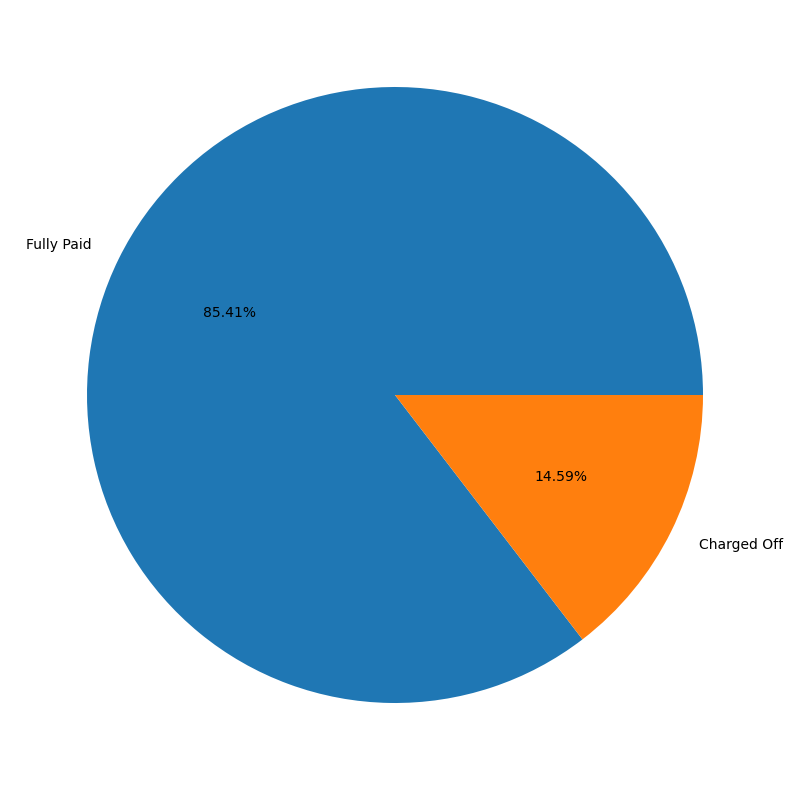

In [16]:
plt.figure(figsize=(10,10))
plt.pie(outcome, labels=['Fully Paid','Charged Off'],autopct='%1.2f%%')
plt.show()

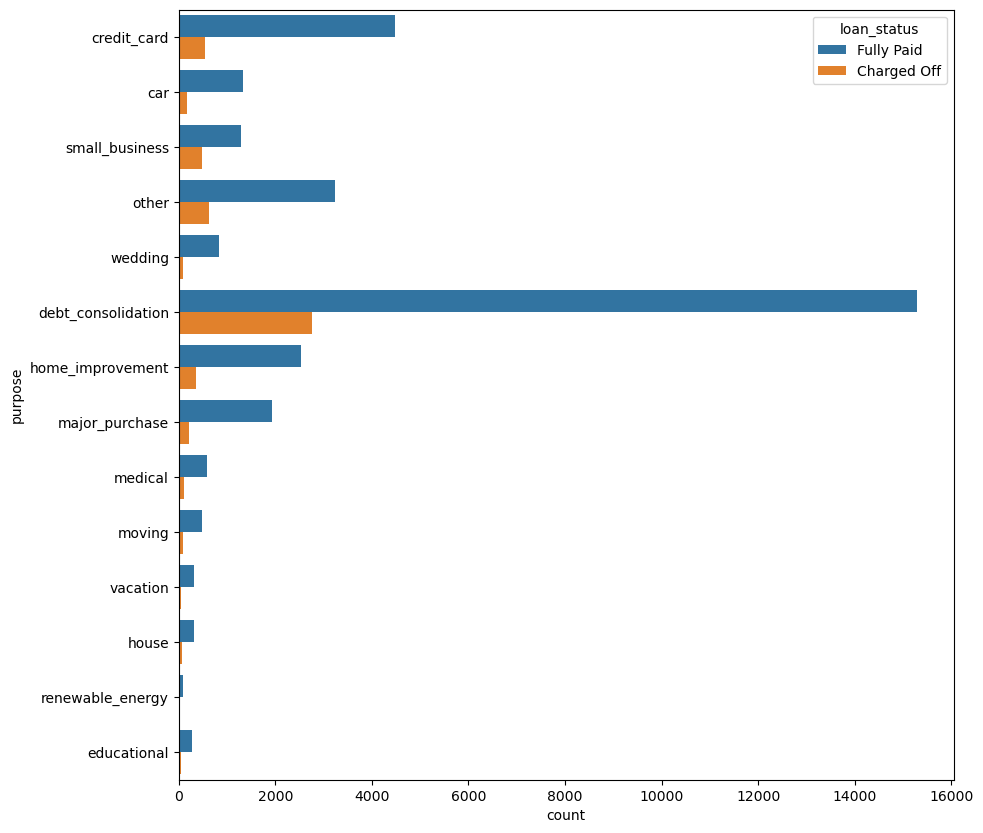

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(y="purpose",data=data,hue='loan_status')
plt.show()

### 83% loans are fully paid. Nearly 14% of the loans are charged off. People took majority of the loans(47%) for debt consolidation. Second main purpose of loans are Credit card payments (13%).

## Removal of Outliers

In [18]:
# Remove Outliers quantile .99 from Annual Income will make  visualizations much better.
def remove_outliers_99quantile(df, columns):
    """
    Removes outliers from a pandas DataFrame using the 0.99 quantile.

    Args:
        df (pandas.DataFrame): The DataFrame to remove outliers from.
        columns (list): The columns to remove outliers from.

    Returns:
        pandas.DataFrame: The DataFrame with outliers removed.
    """

    for col in columns:
        quantile = df[col].quantile(0.99)
        df = df[df[col] <= quantile]

    return df

In [19]:
# Removing outliers of ).99 quantiles using the function created.
data= remove_outliers_99quantile(data,numeric)

In [20]:
list(numeric)

['loan_amnt',
 'funded_amnt',
 'int_rate',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'emp_length',
 'total_pymnt',
 'revol_util']

loan_amnt
Skew : 0.87


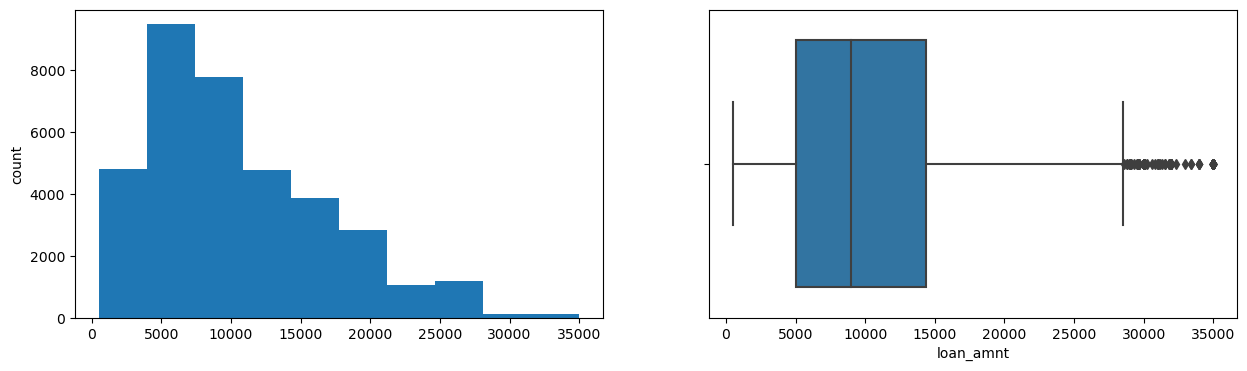

funded_amnt
Skew : 0.8


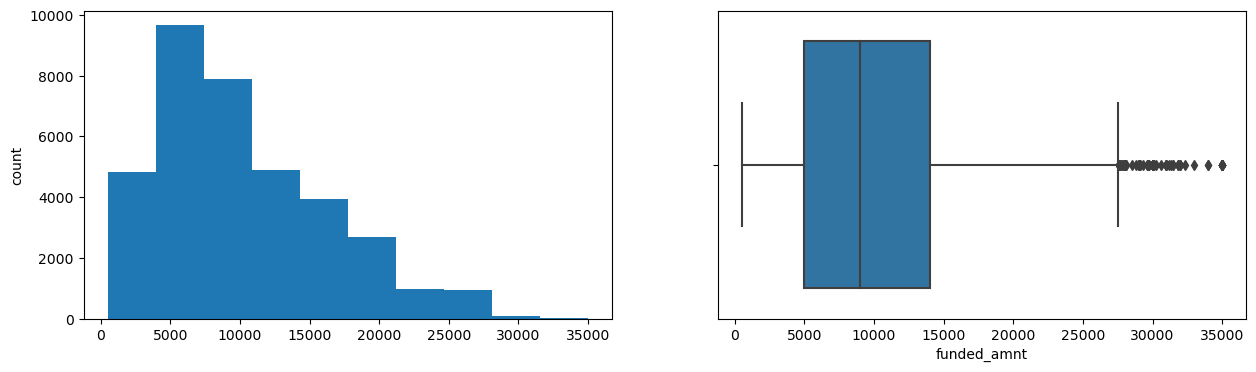

int_rate
Skew : 0.19


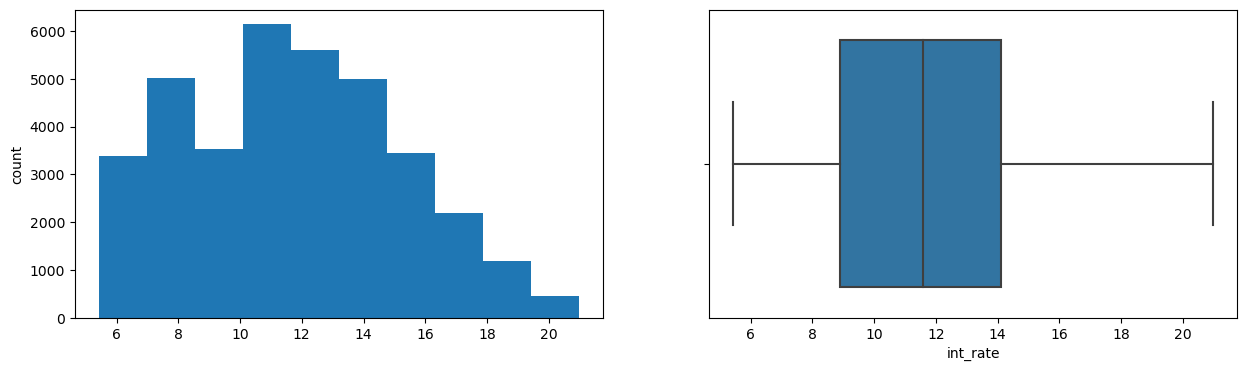

funded_amnt_inv
Skew : 0.8


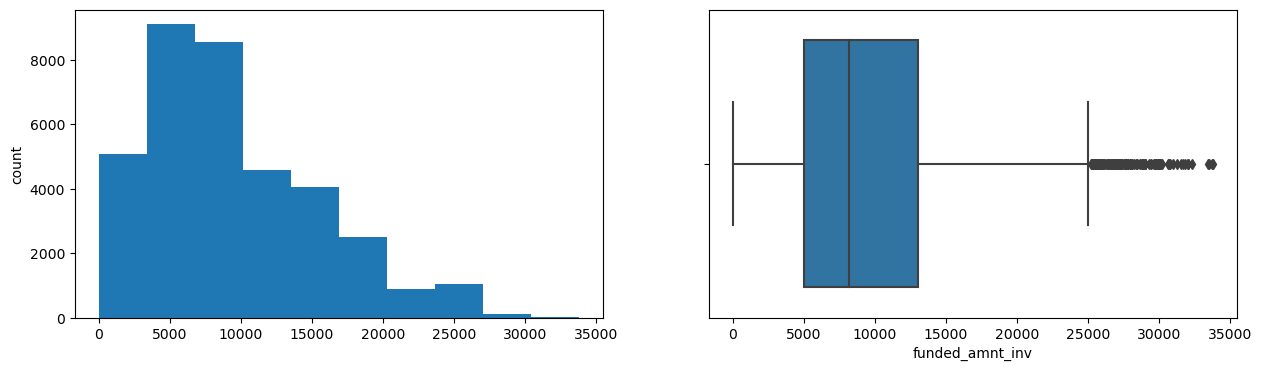

installment
Skew : 0.89


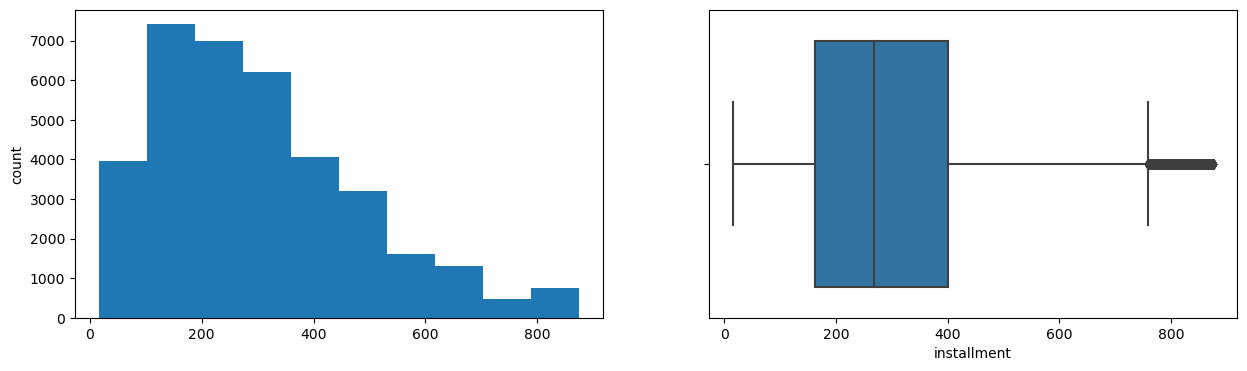

annual_inc
Skew : 1.33


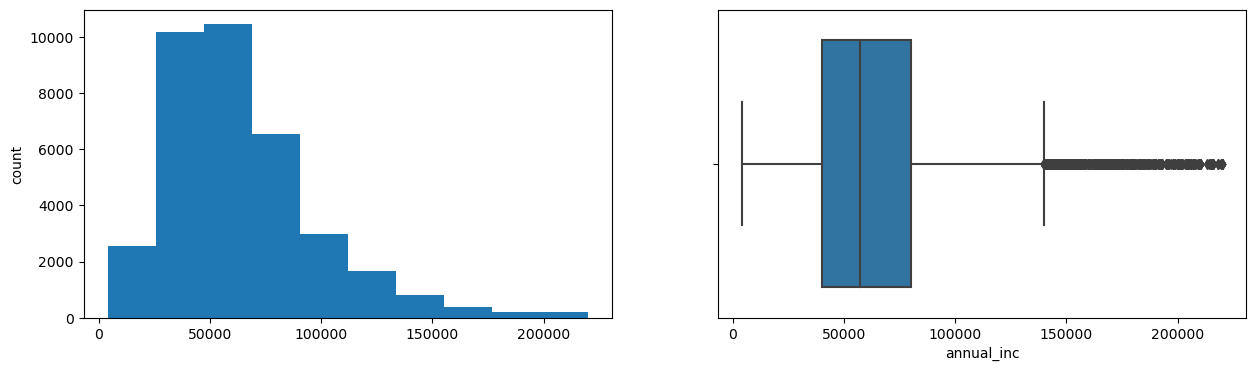

dti
Skew : -0.08


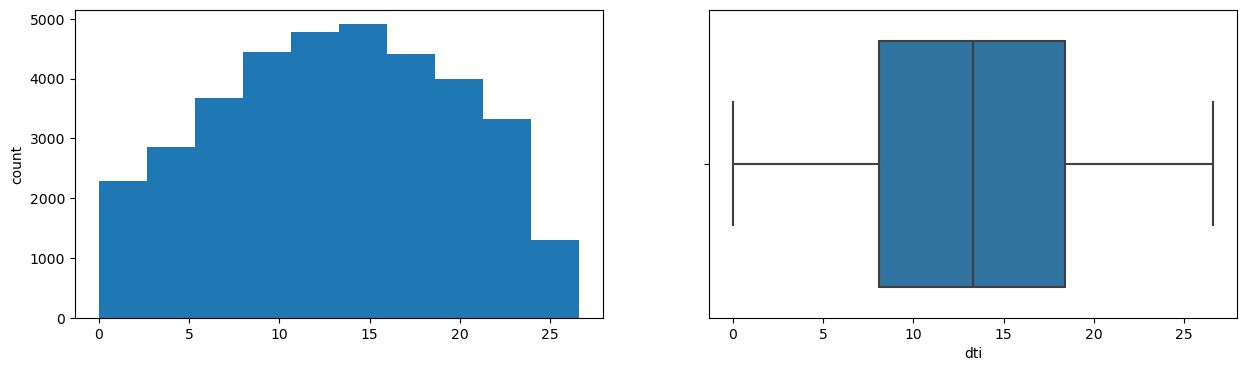

emp_length
Skew : 0.36


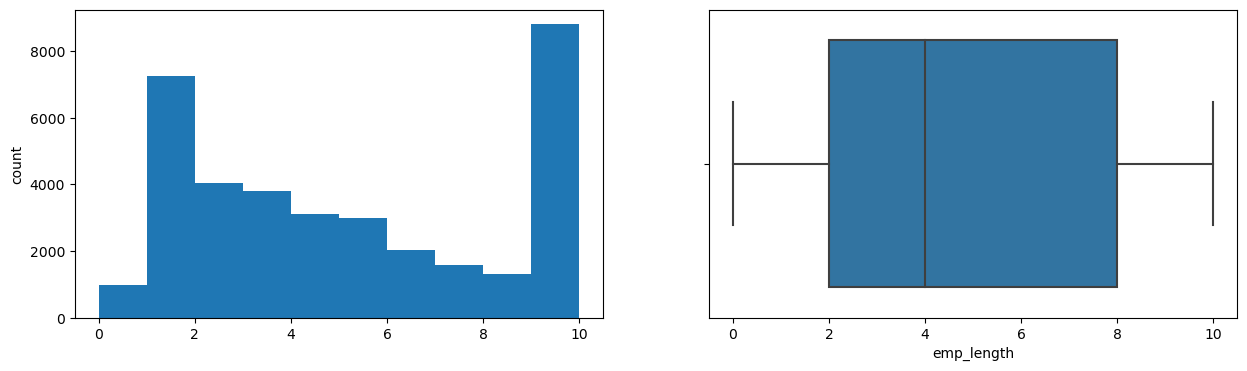

total_pymnt
Skew : 0.91


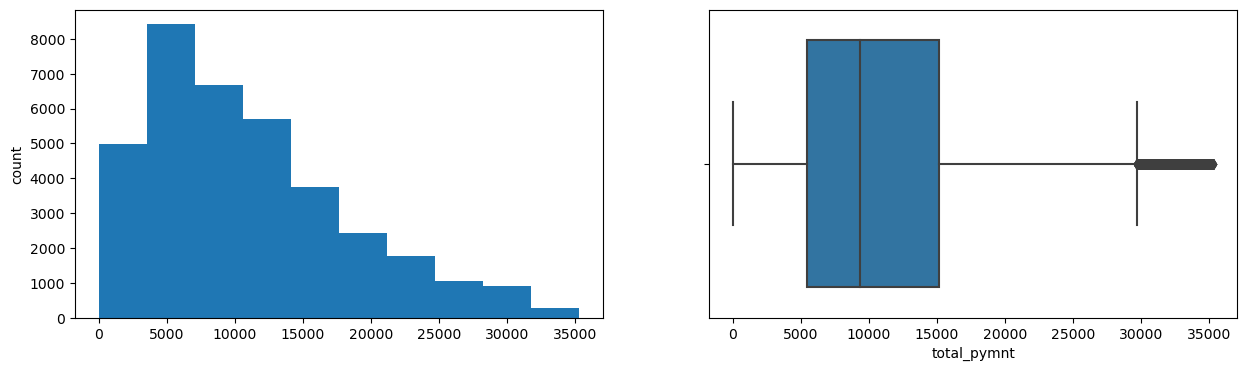

revol_util
Skew : -0.02


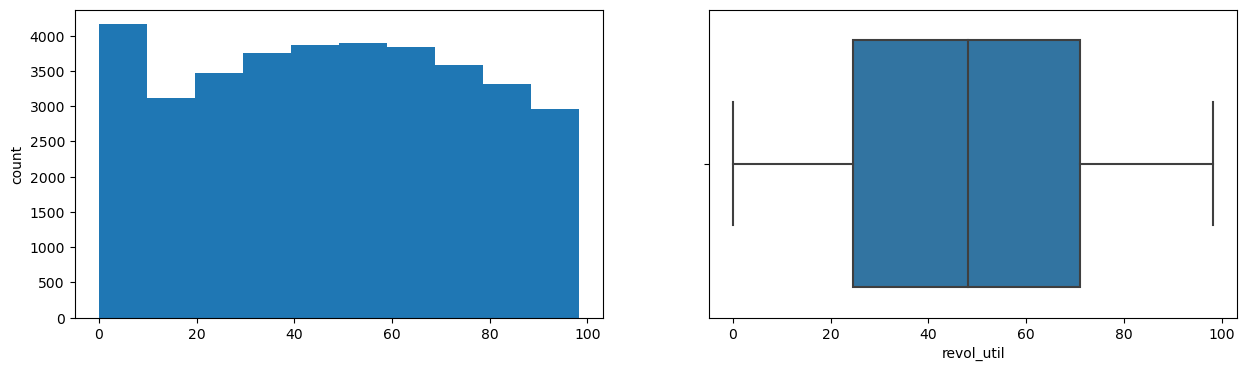

In [21]:
#Plotting the numerical variable to view diistribution and box plots to view median and IQR.
for col in numeric:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

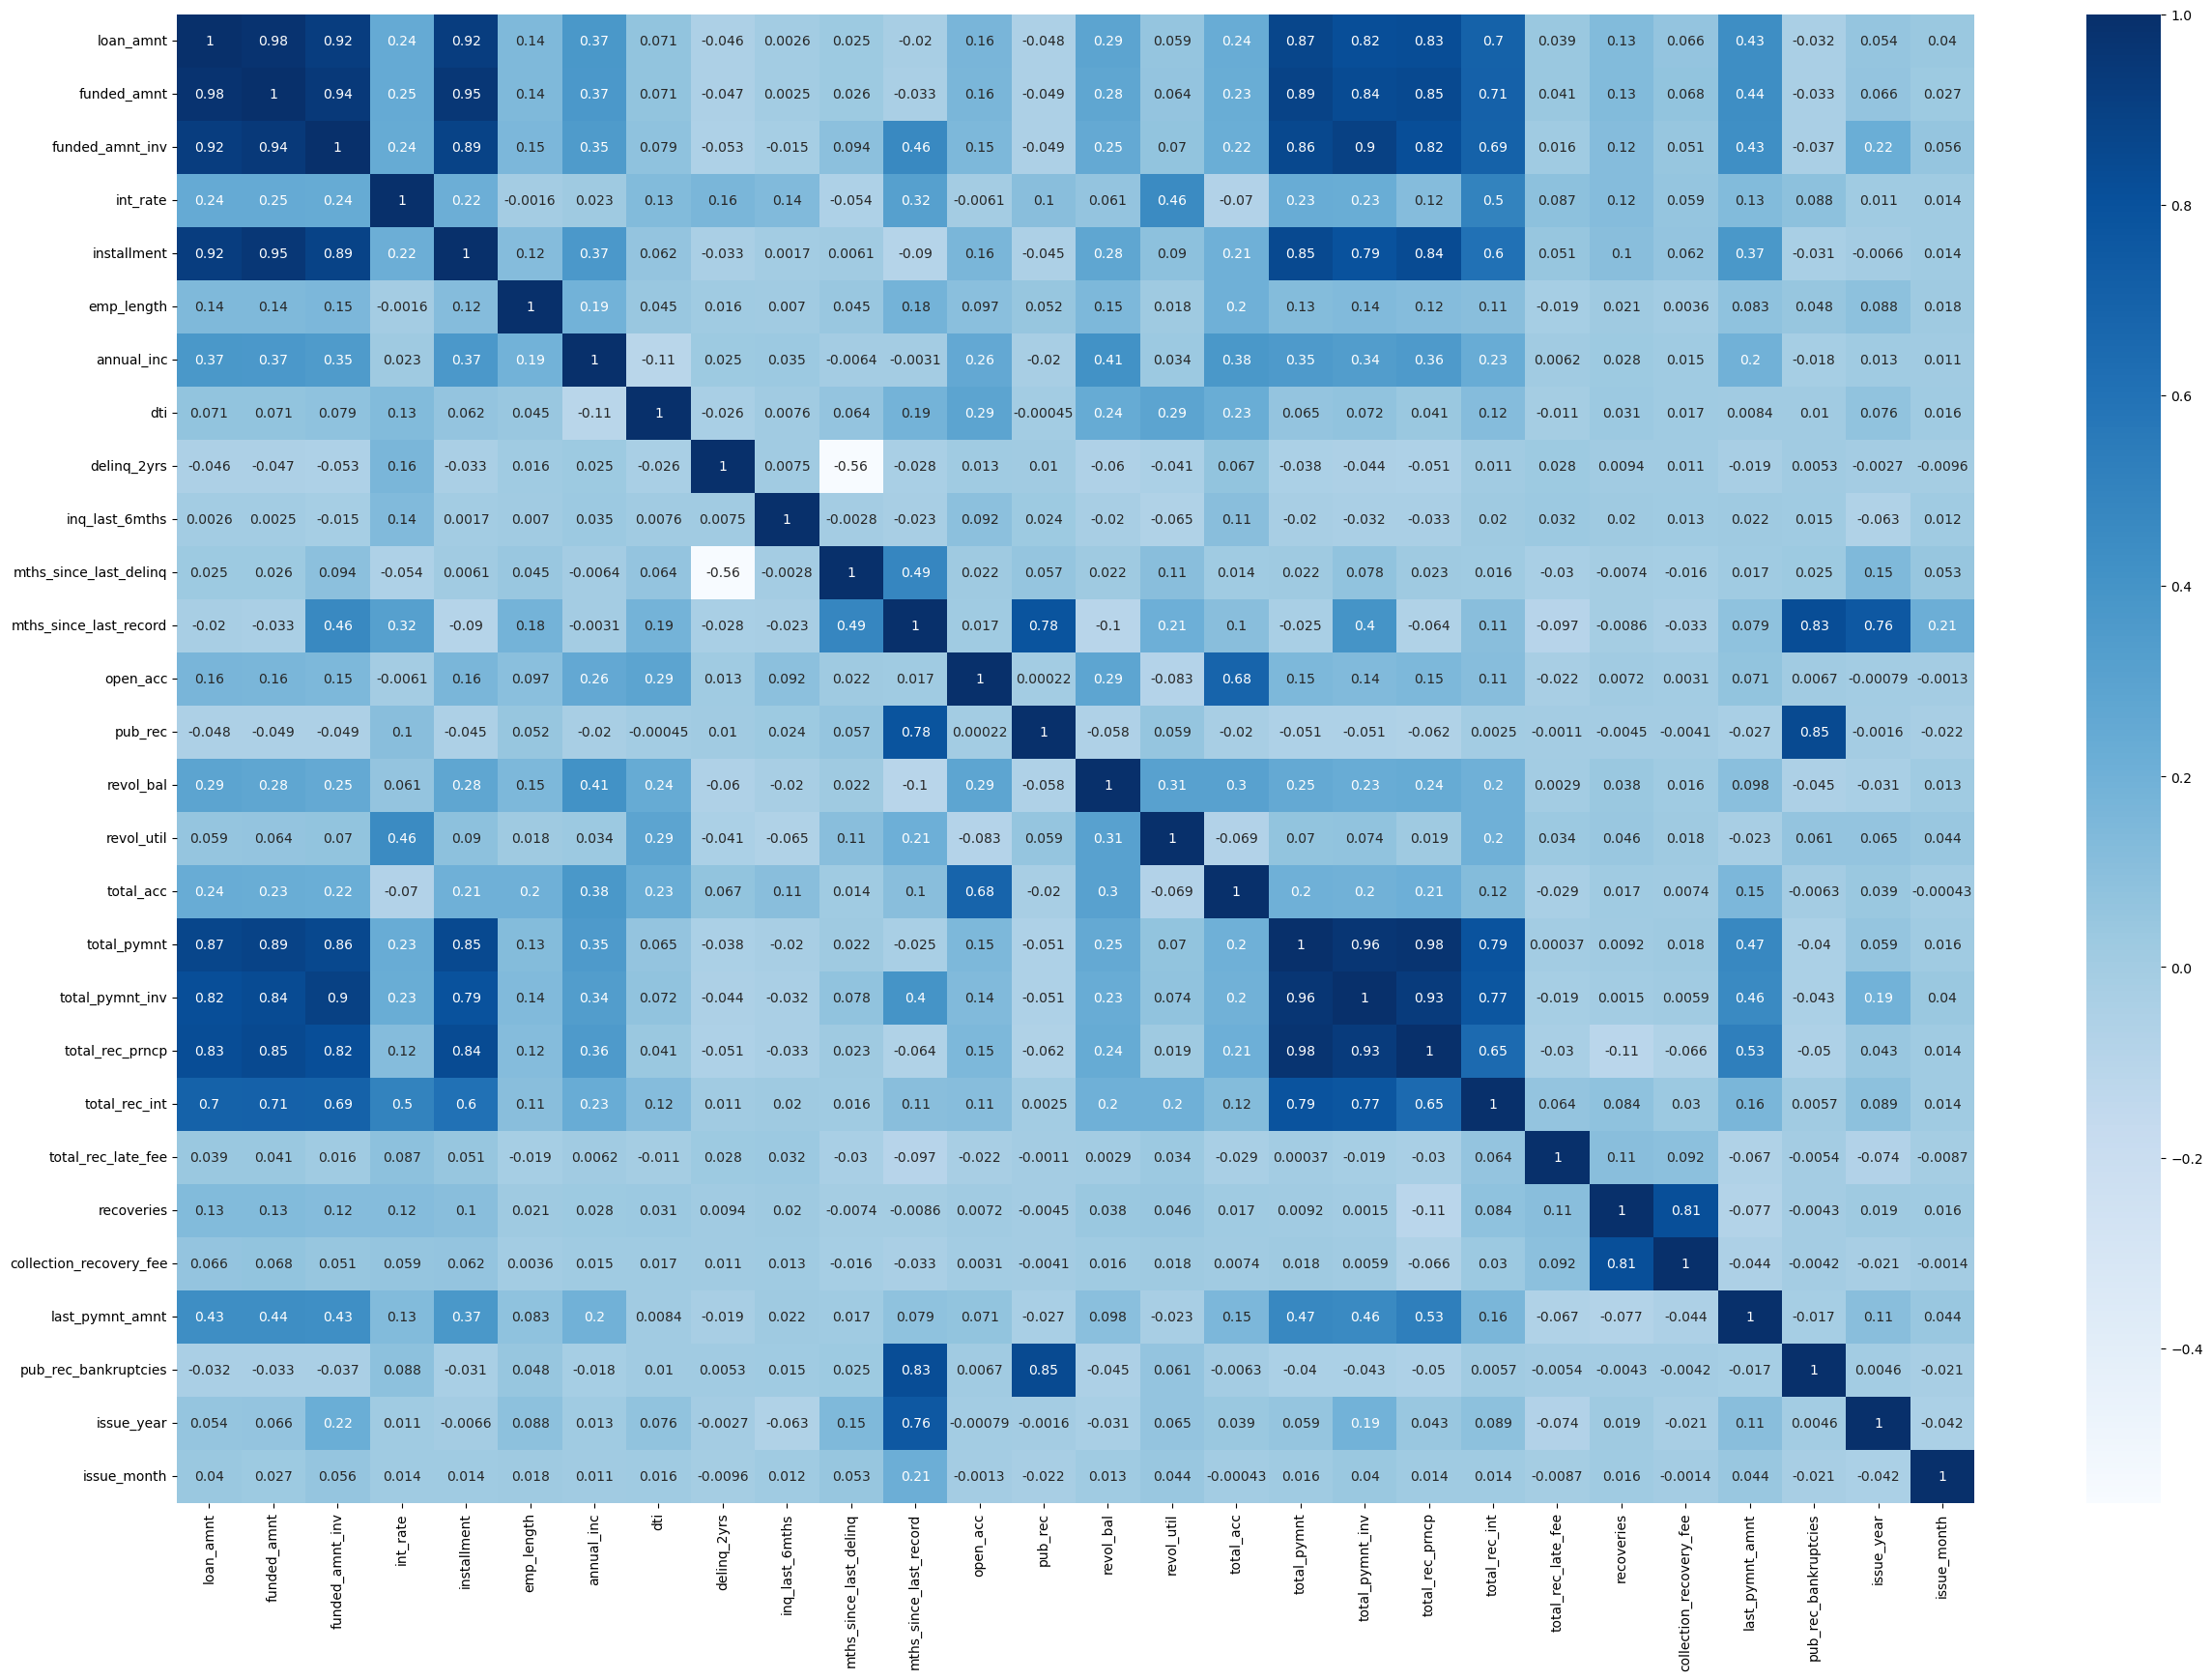

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))

ax = sns.heatmap(data.corr(), annot=True,cmap="Blues")

# Observation is that Loan amount, investor amount, funding amount are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalted.
# Positive correlation between annual income and employment years.

In [25]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
data['loan_amnt_cats'] = pd.cut(data['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
data['annual_inc_cats'] = pd.cut(data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
data['int_rate_cats'] = pd.cut(data['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
data['dti_cats'] = pd.cut(data['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [26]:
# Lets take a look on shape and data
print(data.shape)
data.head(1)
# Observation is we have created extra 5 columns after dropping many.

(35964, 49)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,...,119.66,NaN,Sep-13,0.0,2011,12,0-7000,20000-40000,12.5-16,0-5


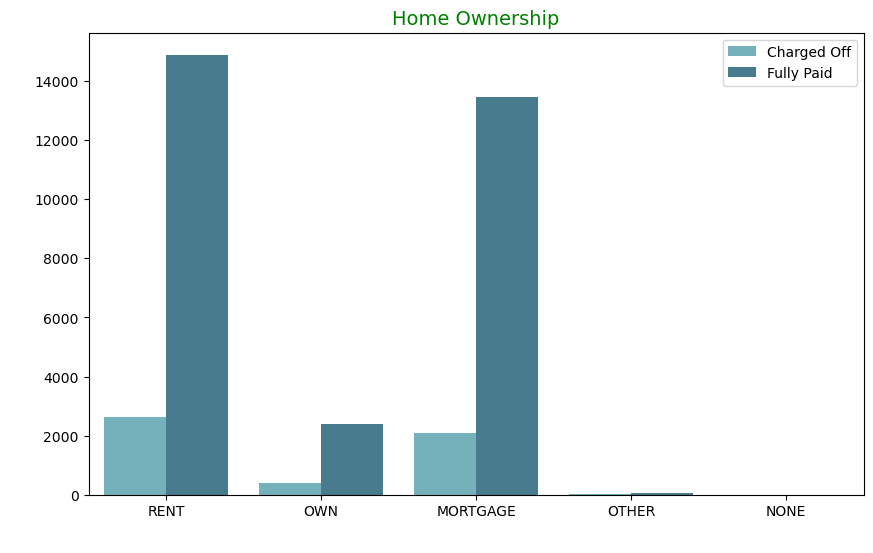

In [27]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6))
ax = sns.countplot(x="home_ownership",data=data,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='g')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

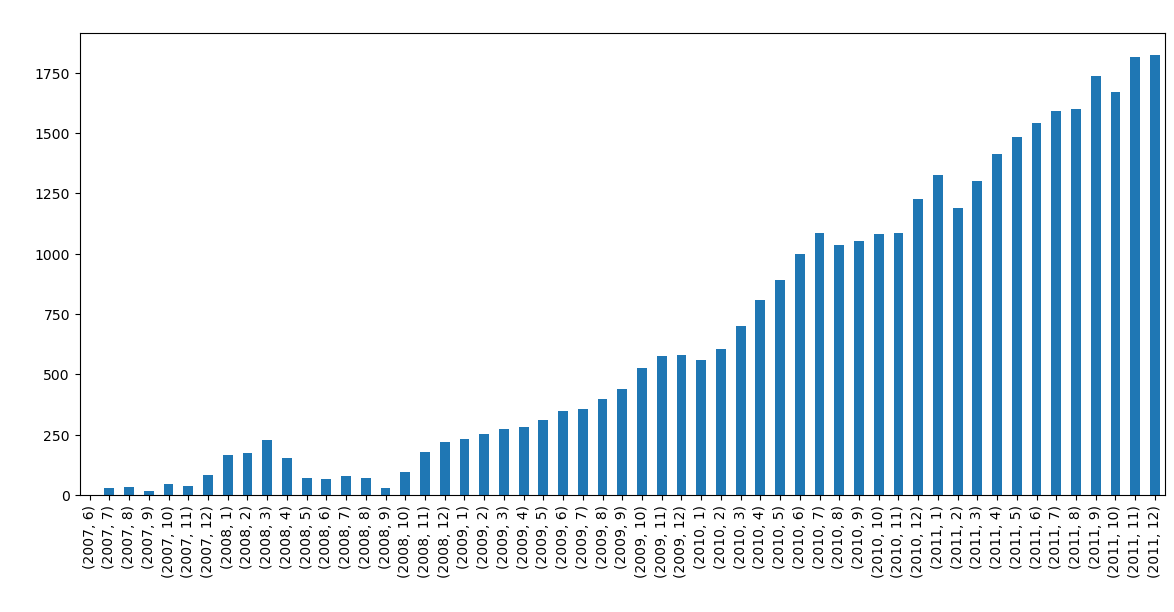

In [28]:
# Derived Column - Ordered Categorical Variables
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.
plt.figure(figsize=(14,6))
data.groupby(['issue_year','issue_month']).grade.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()


# Observation is that count of loan application is increasing every passing year.
# so increase in number of loan applications are adding more to number of charged off applications.
# number of loans issued in 2008( May-October) got dipped, may be due to Recession.

In [29]:
## Comparison Charged off . with year

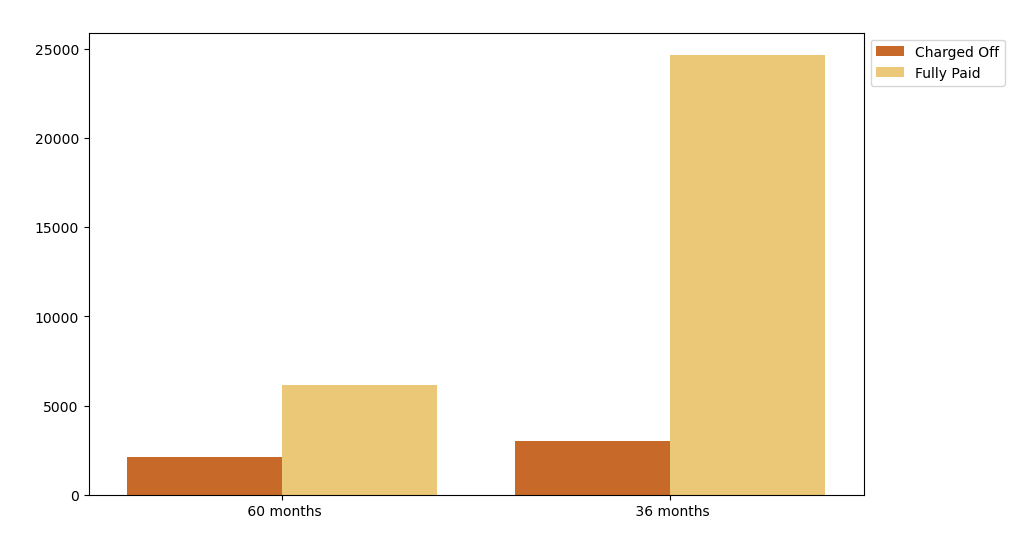

In [30]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6))
ax = sns.countplot(x="term",data=data,hue='loan_status',palette='YlOrBr_r')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

## Bivariate Analysis

#### Here  we analyze certain variables which has a logical role in the outcome of loan by grouping the category variables and ploting the same vs loan outcomes and the then calculating proportion of charged off loans in each category. Poportion of Charged off loans are calculated by creating new column Total and then dividing Charged Off Count with Total count.


In [31]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

ir_and_loan = data.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
ir_and_loan['Total'] = ir_and_loan['Charged Off'] + ir_and_loan['Current'] + ir_and_loan['Fully Paid'] 
ir_and_loan['Chargedoff_Proportion'] = ir_and_loan['Charged Off'] / ir_and_loan['Total']
ir_and_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

KeyError: 'Current'

In [ ]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

loantype_default = data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
loantype_default['Total'] = loantype_default['Charged Off'] + loantype_default['Current'] + loantype_default['Fully Paid'] 
loantype_default['Chargedoff_Proportion'] = loantype_default['Charged Off'] / loantype_default['Total']

loantype_default.sort_values('Chargedoff_Proportion',ascending=False)#purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Type of Loans and Chargedoff Proportion',fontsize=15,color = 'b')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=loantype_default)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# small Business applicants have high chances of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.
# Observations:
# small Business applicants have high chnaces of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

In [ ]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = data.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='r')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged of is increasing with grade moving from "A" towards "G"

In [ ]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = data.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Current'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

In [ ]:
#Analyzing interest rate wrt the interest rate bins created
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_cats', data=data[data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=data[data.loan_status == 'Charged Off'])
plt.show()

In [ ]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_vs_loan = data.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7))
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

In [ ]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(12,8))
ax = sns.boxplot(y='purpose', x='loan_amnt', data =data,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=18,color='b')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card comes 3rd.

In [ ]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =data,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

In [ ]:
sns.boxplot(data["loan_amnt"])

In [ ]:
cross1=pd.crosstab(data.purpose,data.loan_status,normalize='index')
print(cross1)